1) Implement Contrast Enhancement of an Image without using
OpenCV.

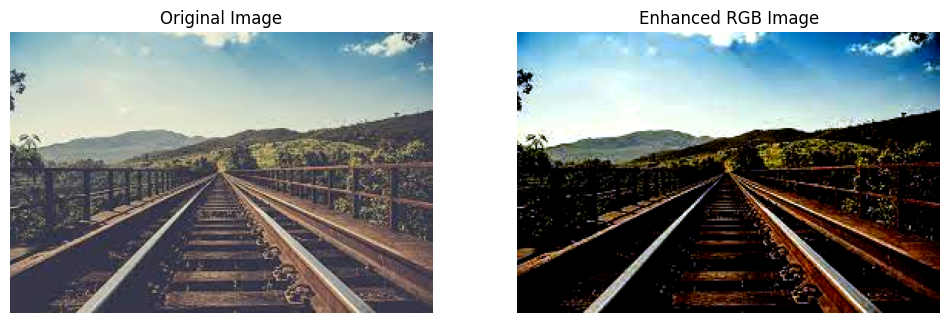

In [10]:
# Example Python Program for contrast stretching

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


# Method to process the red band of the image

def normalizeRed(intensity):
    iI      = intensity
    minI    = 86
    maxI    = 230
    minO    = 0
    maxO    = 255
    iO      = (iI-minI)*(((maxO-minO)/(maxI-minI))+minO)
    return iO

# Method to process the green band of the image
def normalizeGreen(intensity):
    iI      = intensity
    minI    = 90
    maxI    = 225
    minO    = 0
    maxO    = 255
    iO      = (iI-minI)*(((maxO-minO)/(maxI-minI))+minO)
    return iO


# Method to process the blue band of the image
def normalizeBlue(intensity):
    iI      = intensity
    minI    = 100
    maxI    = 210
    minO    = 0
    maxO    = 255
    iO      = (iI-minI)*(((maxO-minO)/(maxI-minI))+minO)
    return iO

# Create an image object
imageObject     = Image.open("input.jpeg")

# Split the red, green and blue bands from the Image
multiBands      = imageObject.split()

# Apply point operations that does contrast stretching on each color band
normalizedRedBand      = multiBands[0].point(normalizeRed)
normalizedGreenBand    = multiBands[1].point(normalizeGreen)
normalizedBlueBand     = multiBands[2].point(normalizeBlue)

# Create a new image from the contrast stretched red, green and blue brands
normalizedImage = Image.merge("RGB", (normalizedRedBand, normalizedGreenBand, normalizedBlueBand))


# Display original and contrast-stretched images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(imageObject)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(normalizedImage)
axes[1].set_title('Enhanced RGB Image')
axes[1].axis('off')
plt.show()

2) Compare different smoothing methods using OpenCV.

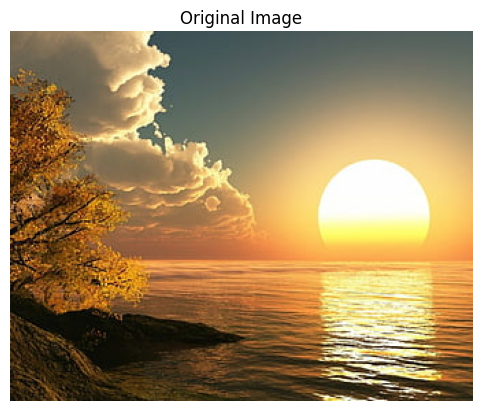

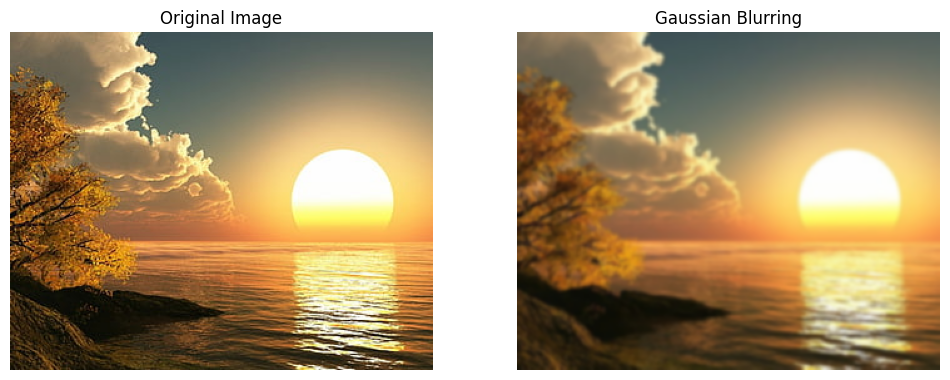

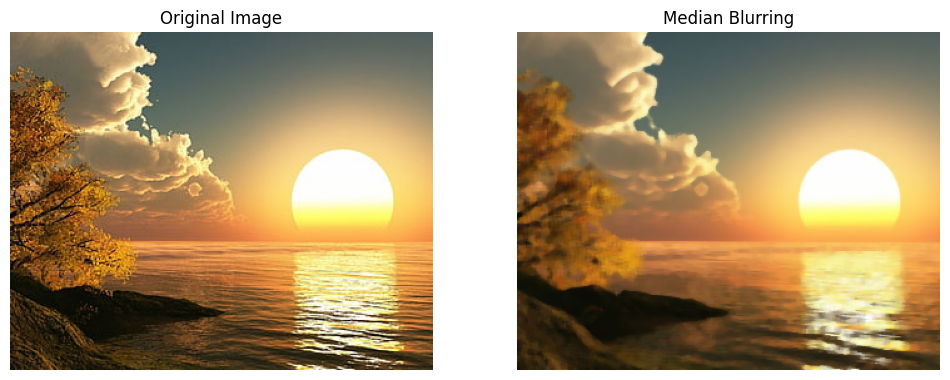

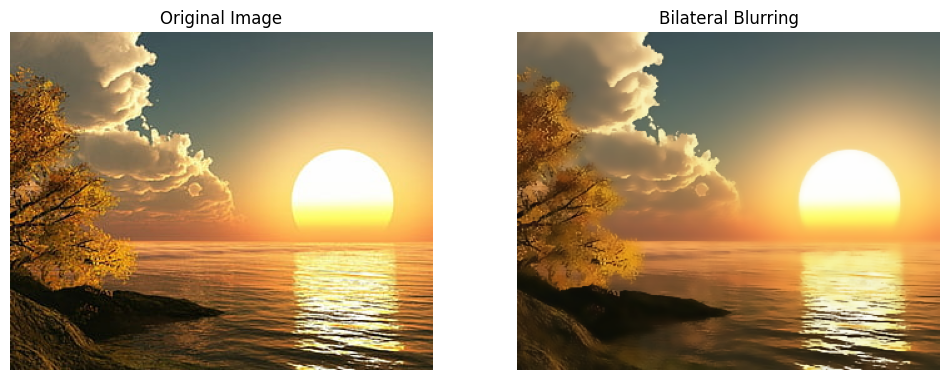

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_side_by_side(original, blurred, title_original, title_blurred):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    axes[0].set_title(title_original)
    axes[0].axis('off')
    axes[1].imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
    axes[1].set_title(title_blurred)
    axes[1].axis('off')
    plt.show()

# Load the image
image = cv2.imread('input2.jpg')

# Display original image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()

# Apply Gaussian Blur
gaussian = cv2.GaussianBlur(image, (7, 7), 0)
display_side_by_side(image, gaussian, 'Original Image', 'Gaussian Blurring')

# Apply Median Blur
median = cv2.medianBlur(image, 5)
display_side_by_side(image, median, 'Original Image', 'Median Blurring')

# Apply Bilateral Blur
bilateral = cv2.bilateralFilter(image, 9, 75, 75)
display_side_by_side(image, bilateral, 'Original Image', 'Bilateral Blurring')
